# Lecture 30 - Logistic Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

# Logistic Discrimination, sometimes called Logistic Regression

*Note that, despite of its name, logistic regression is a model for classification, not regression.*

The **logistic discriminant** is a linear model for binary classification that can be extended to multi-class classification using the one-vs-all approach.

In logistic logistic discrimination, we do not model the class-conditional densities, $p(x|C_i)$, but rather their ratio. Let us assume we are working with a two-class problem and assume that the log likelihood ratio (or **odds ratio**) is linear:

$$\log\frac{P(x|C_1)}{P(x|C_2)} = \mathbf{w}^Tx + b$$

* This is only true, if the classes are Gaussian-distributed!

* But logistic discrimination has a wider scope of applicability; for example, $x$ may be composed of discrete attributes or may be a mixture of continuous and discrete attributes. Using Bayes’ rule, we have:

\begin{align}
\operatorname{logit} P(C_1|x) &=\log \frac{P(C_1|x)}{1-P(C_1|x)}\\
&= \log \frac{P(x|C_1)}{P(x|C_2)} + \log \frac{P(C_1)}{P(C_2)} \\
&= \mathbf{w}^Tx + w_0
\end{align}

where $w_0 = b + \log \frac{P(C_1)}{P(C_2)}$.

Rearranging terms, we get the probabilistic classification:

$$y = P(C_1|x) = \frac{1}{1+\exp\left(-(\mathbf{w}^Tx+w_0)\right)}$$

This is the sigmoid function:

$$\phi(z) = \frac{1}{1+\exp(-z)}$$

In [ ]:
z = np.linspace(-8,8,100)

plt.figure(figsize=(7,5))
plt.plot(z, 1/(1+np.exp(-z)))
plt.plot(z, [0.5]*len(z),'--')
plt.xlabel('$z$',size=20); plt.ylabel('$\phi(z)$',size=20);
plt.title('Sigmoid Function',size=15);

* We can see that $\phi(z)\rightarrow 1$ as $z\rightarrow\infty$, since $\exp(-z)$ becomes very small for large values of $z$.

* Similarly, $\phi(z)\rightarrow 0$ as $z\rightarrow -\infty$ as the result of an increasingly large denominator. 

Thus, we conclude that this sigmoid function takes real number values as input and transforms them to values in the range $[0, 1]$ with an intercept at $\phi(z)=0.5$.

This is the same as using a sigmoid function as the **activation function** in the perceptron diagram.

Thus the output of the sigmoid function is then interpreted as the probability of particular sample belonging to $C_1$, given its features $x$ parameterized by the weights $w$. 

* For example, if we compute $\phi(z)=0.8$ for a particular sample, it means that the chance that this sample is in $C_1$ is 80%. 

The predicted probability can then simply be converted into a binary outcome via a quantizer (unit step function):

\begin{align}
\hat{t} = y &= \begin{cases}1, & \phi(z)\geq 0.5\\ 0, & \text{otherwise}\end{cases}\\
&=\begin{cases}1, & \phi(\mathbf{w}^Tx+w_0)\geq 0.5\\ 0, & \text{otherwise}\end{cases}
\end{align}

or,

\begin{align}
\hat{t} = y &= \begin{cases}1, & z\geq 0\\ 0, & z<0\end{cases} \\
&= \begin{cases}1, & \mathbf{w}^Tx+w_0\geq 0\\ 0, & \mathbf{w}^Tx+w_0<0\end{cases}
\end{align}

## The Objective Function

Let $\{(x_i,t_i)\}_{i=1}^N$ be the set of input samples and its class labels, where $t_i\in\{0,1\}$. Assuming the data samples are i.i.d., we can build the observed data likelihood:

$$\mathcal{L}^0 = \prod_{i=1}^N P(y_i|x_i; \mathbf{w}) = \phi(z_i)^{t_i}(1-\phi(z_i))^{1-t_i}$$

We can apply the "trick" (log-likelihood) to build the data likelihood":

$$\mathcal{L} = \sum_{i=1}^N t_i\log\phi(z_i) +(1-t_i)\log(1-\phi(z_i))$$

where $\phi(z) = \frac{1}{1+\exp(-z)}$ and $z_i = \mathbf{w}^Tx_i+w_0$.

We want to maximize this likelihood to the data, or we can also write it as a minimization optimization:

$$J(\mathbf{w},w_0) = \sum_{i=1}^N - t_i\log\phi(z_i) - (1-t_i)\log(1-\phi(z_i))$$

This objective function is also known as **cross-entropy**.

In [ ]:
z = np.linspace(-2,2,100)

phi = lambda z: 1/(1+np.exp(-z))

plt.figure(figsize=(7,5))
plt.plot(phi(z), -np.log(phi(z)),label='when $t=1$')
plt.plot(phi(z), -np.log(1-phi(z)),'--',label='when $t=0$')
plt.legend(fontsize=15); plt.xlabel('$\phi(z)$',size=20)
plt.ylabel('$J(\mathbf{w})$',size=20);

We can see that the cost approaches 0 if we correctly predict that a sample belongs to class 1. Similarly, we can see on the y axis that the cost also approaches 0 if we correctly predict class 0. However, if the prediction is wrong, the cost goes towards infinity: we penalize wrong predictions with an increasingly larger cost.

As we do not have the global *picture* of what the objective function, $J(\mathbf{w})$, we apply a search method to navigate through the objective function to find the *local optima* starting from an initial value, namely, **gradient descent**.

$$\mathbf{w}^{(t+1)} \longleftarrow \mathbf{w}^{(t)} - \eta \frac{\partial J(\mathbf{w})}{\partial \mathbf{w}^{(t)}}$$

$$\mathbf{w_0}^{(t+1)} \longleftarrow \mathbf{w_0}^{(t)} - \eta \frac{\partial J(\mathbf{w})}{\partial \mathbf{w_0}^{(t)}}$$

where $\eta$ is the learning rate (or step size).

$$\frac{\partial J(\mathbf{w})}{\partial \mathbf{w}^{(t)}} =
\sum_{i=1}^N -t_i\frac{1}{\phi(z_i)}\frac{\partial\phi(z_i)}{\partial z_i}\frac{\partial z_i}{\partial\mathbf{w}} -(1-t_i)\frac{1}{1-\phi(z_i)}\left(-\frac{\partial\phi(z_i)}{\partial z_i}\frac{\partial z_i}{\partial\mathbf{w}}\right)$$

where $\frac{\partial\phi(z_i)}{\partial z_i} = \phi'(z_i)$ and $\frac{\partial z_i}{\partial\mathbf{w}} = x_i$. Substituting:

\begin{align}
\frac{\partial J(\mathbf{w})}{\partial \mathbf{w}^{(t)}} &= \sum_{i=1}^N -t_i \frac{\phi'(z_i)}{\phi(z_i)} x_i + (1-t_i)\frac{\phi'(z_i)}{1-\phi(z_i)} x_i \\
&= \sum_{i=1}^N \left(\frac{t_i}{\phi(z_i)} - \frac{1-t_i}{1-\phi(z_i)}\right)\phi'(z_i)x_i
\end{align}

where $\phi'(z_i)= \phi(z_i)(1-\phi(z_i))$, then applying some substitutions we have:

$$\frac{\partial J(\mathbf{w})}{\partial \mathbf{w}^{(t)}} = (t_i - y_i)x_i$$

and, similarly,

$$\frac{\partial J(\mathbf{w})}{\partial w_0^{(t)}} = (t_i - y_i)$$

Finally,

$$\mathbf{w}^{(t+1)} \longleftarrow \mathbf{w}^{(t)} - \eta (t_i - y_i)x_i$$

$$\mathbf{w_0}^{(t+1)} \longleftarrow \mathbf{w_0}^{(t)} - \eta (t_i - y_i)$$

**Initialization:** it is best to initialize $\mathbf{w}$ with random values close to 0; generally they are drawn uniformly from the interval $[−0.01, 0.01]$. 

* The reason for this is that if the initial $\mathbf{w}$ are large in magnitude, the weighted sum may also be large and may saturate the sigmoid. 

* If the initial weights are close to 0, the sum will stay in the middle region where the derivative is nonzero and an update can take place. 

* If the weighted sum is large in magnitude (smaller than −5 or larger than +5), the derivative of the sigmoid will be almost 0 and weights will not be updated. 
    * When we stack up a lot of these perceptrons in layers and add a few layers, this "close to 0" gradient will lead to a phenomenon in neural networks known as the **vanishing gradient**.

In [ ]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
plt.style.use('seaborn-colorblind')

h = .02  # step size in the mesh

names = ["Naive Bayes", "kNN (k=3)", "LDA", "Perceptron", "Logistic\nDiscrimination"]

classifiers = [
    GaussianNB(),
    KNeighborsClassifier(3),
    LinearDiscriminantAnalysis(),
    Perceptron(),
    LogisticRegression()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

X2, y2 = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1, n_classes=3)
rng = np.random.RandomState(2)
X2 += 2 * rng.uniform(size=X2.shape)
linearly_separable2 = (X2, y2)


datasets = [make_moons(noise=0.3, random_state=0),
            linearly_separable,
           linearly_separable2]

figure = plt.figure(figsize=(15, 8))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['red', 'orange','blue'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data", fontsize=20)
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X, y)
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, edgecolors='k')

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name, fontsize=20)
        i += 1

plt.tight_layout()

___

# Kernel Machine

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

A linear discriminative classifier would attempt to draw a straight line separating the two sets of data, and thereby create a model for classification. For two dimensional data like that shown here, this is a task we could do by hand. But immediately we see a problem: there is more than one possible dividing line that can perfectly discriminate between the two classes!

We can draw them as follows:

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

These are three very different separators which, nevertheless, perfectly discriminate between these samples. Depending on which you choose, a new data point (e.g., the one marked by the "X" in this plot) will be assigned a different label! Evidently our simple intuition of "drawing a line between classes" is not enough, and we need to think a bit deeper.

# Kernel Machine

Consider the following data set:

In [ ]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

The two classes are clearly not linearly separable. What would you do?

In [ ]:
r = np.exp(-((X - X.mean(axis=0))** 2/(2*X.std(axis=0, ddof=1)**2)).sum(axis=1))

In [ ]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

%matplotlib notebook
plot_3D();

## Support Vector Machines: Maximizing the Margin

SVMs offer one way to improve on this. The intuition is this: rather than simply drawing a zero-width line between the classes, we can draw around each line a margin of some width, up to the nearest point. Here is an example of how this might look:

In [ ]:
%matplotlib inline
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

In support vector machines, the line that maximizes this margin is the one we will choose as the optimal model. Support vector machines are an example of such a maximum margin estimator.

# Support Vector Machine: Separable Classes

Let's start with the two-class linearly separable task and then we will extend the method to more general cases where data are not separable. Let $\phi(x_i)$, $i=1,2,\dots,N$, be the feature vectors of the training set, $X$, and corresponding target values $t_1, t_2, \cdots, t_N$ where $t_n\in\{-1,1\}$. These belong to either of two classes, $C_1$, $C_2$, which are *assumed to be linearly separable*.

The goal, once more, is to design a hyperplane

$$y(x) = w^T\phi(x) + b = 0$$

that classifies correctly all the training vectors.

Because the training data is linearly separable in the feature space, by definition there exists at least one choice of the parameters $w$ and $b$ such that $y(x)$ satisfies $y(x_n)>0$ for points having $t_n = +1$ and $y(x_n)<0$ for points having $t_n = -1$, so that $t_ny(x_n) > 0$ for all training data points.

Such a hyperplane is not unique. The perceptron algorithm may converge to any one of the possible solutions. Having gained in experience, this time we will be more demanding. 

* Which hyperplane would any sensible engineer choose as the classifier for operation in practice, where data outside the training set will be fed to it? 

* Once again, the hyperplane that leaves more “room” on either side, so that data in both classes can move a bit more freely, with less risk of causing an error. 

* A sensible choice for the hyperplane classifier would be the one that leaves the maximum margin from both classes.

* Thus such a hyperplane can be trusted more, when it is faced with the challenge of operating with unknown data.
    * It has a higher generalizarion performance.

## Quantifying the "Margin"

Let us now quantify the term "margin" that a hyperplane leaves from both classes. Every hyperplane is characterized by its direction (determined by $w$) and its exact position in space (determined by $b$). Since we want to give no preference to either of the classes, then it is reasonable for each direction to select that hyperplane which has the same distance from the respective nearest points in $c_1$ and $c_2$.

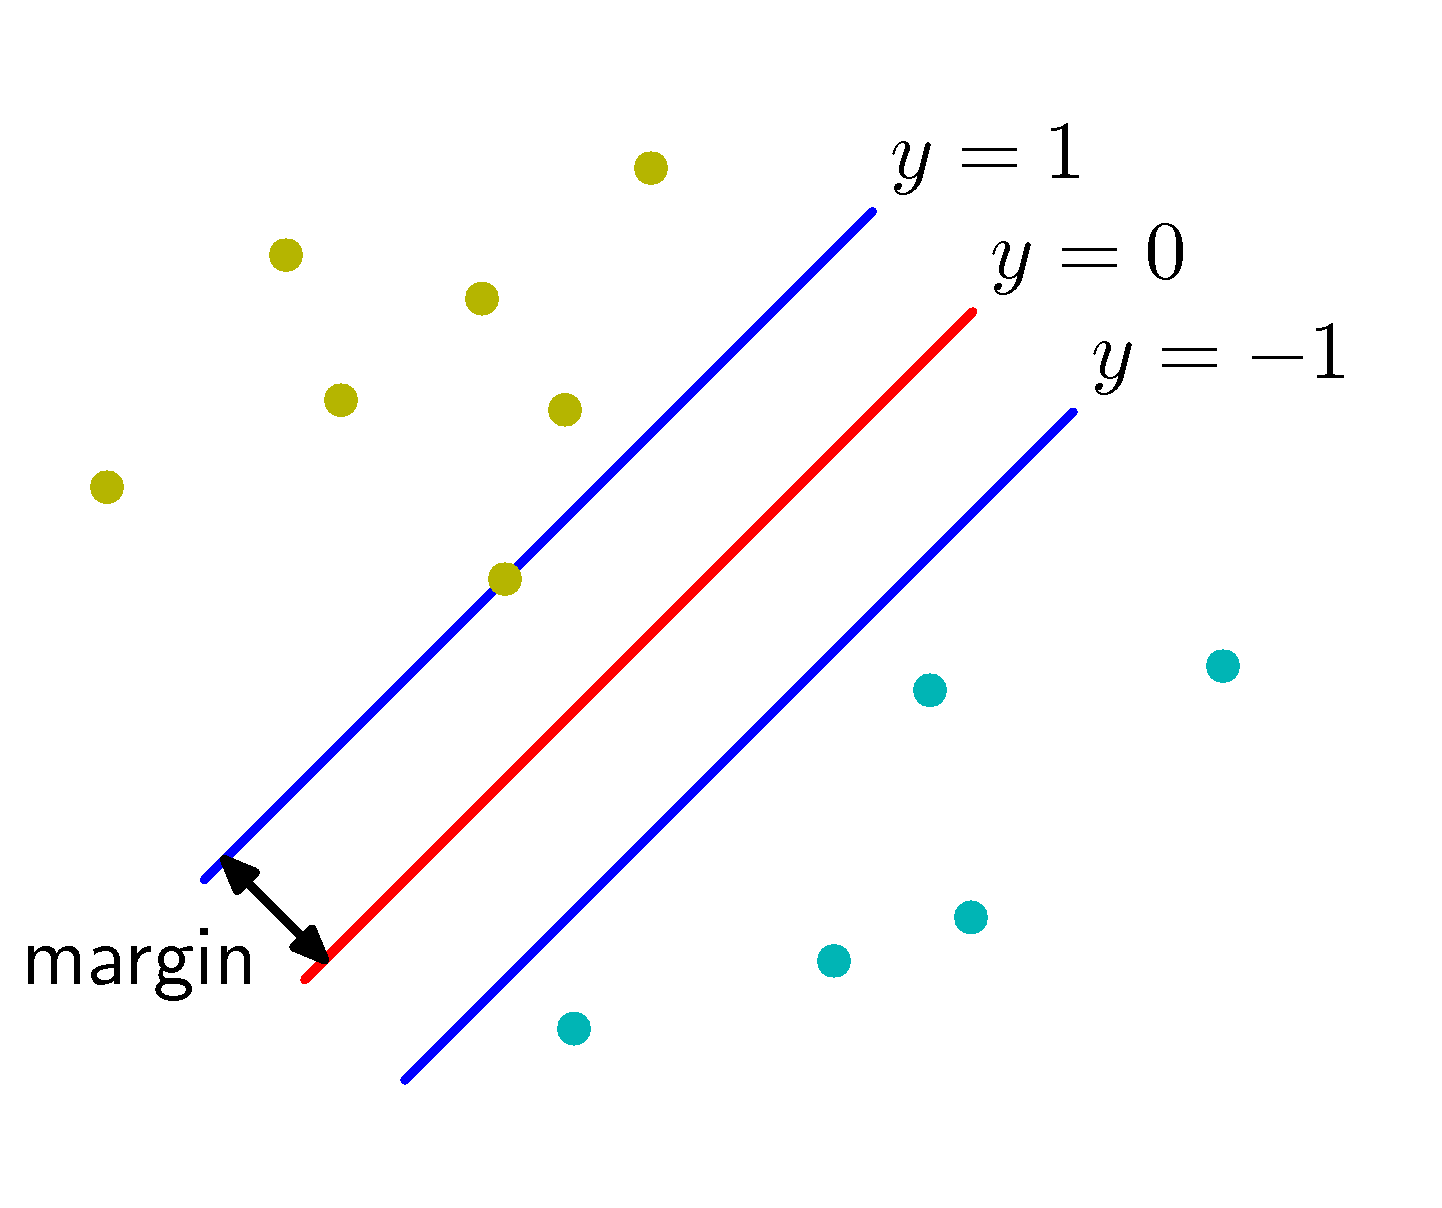

In [1]:
from IPython.display import Image
Image('figures/Figure7.1a.png', width=400)

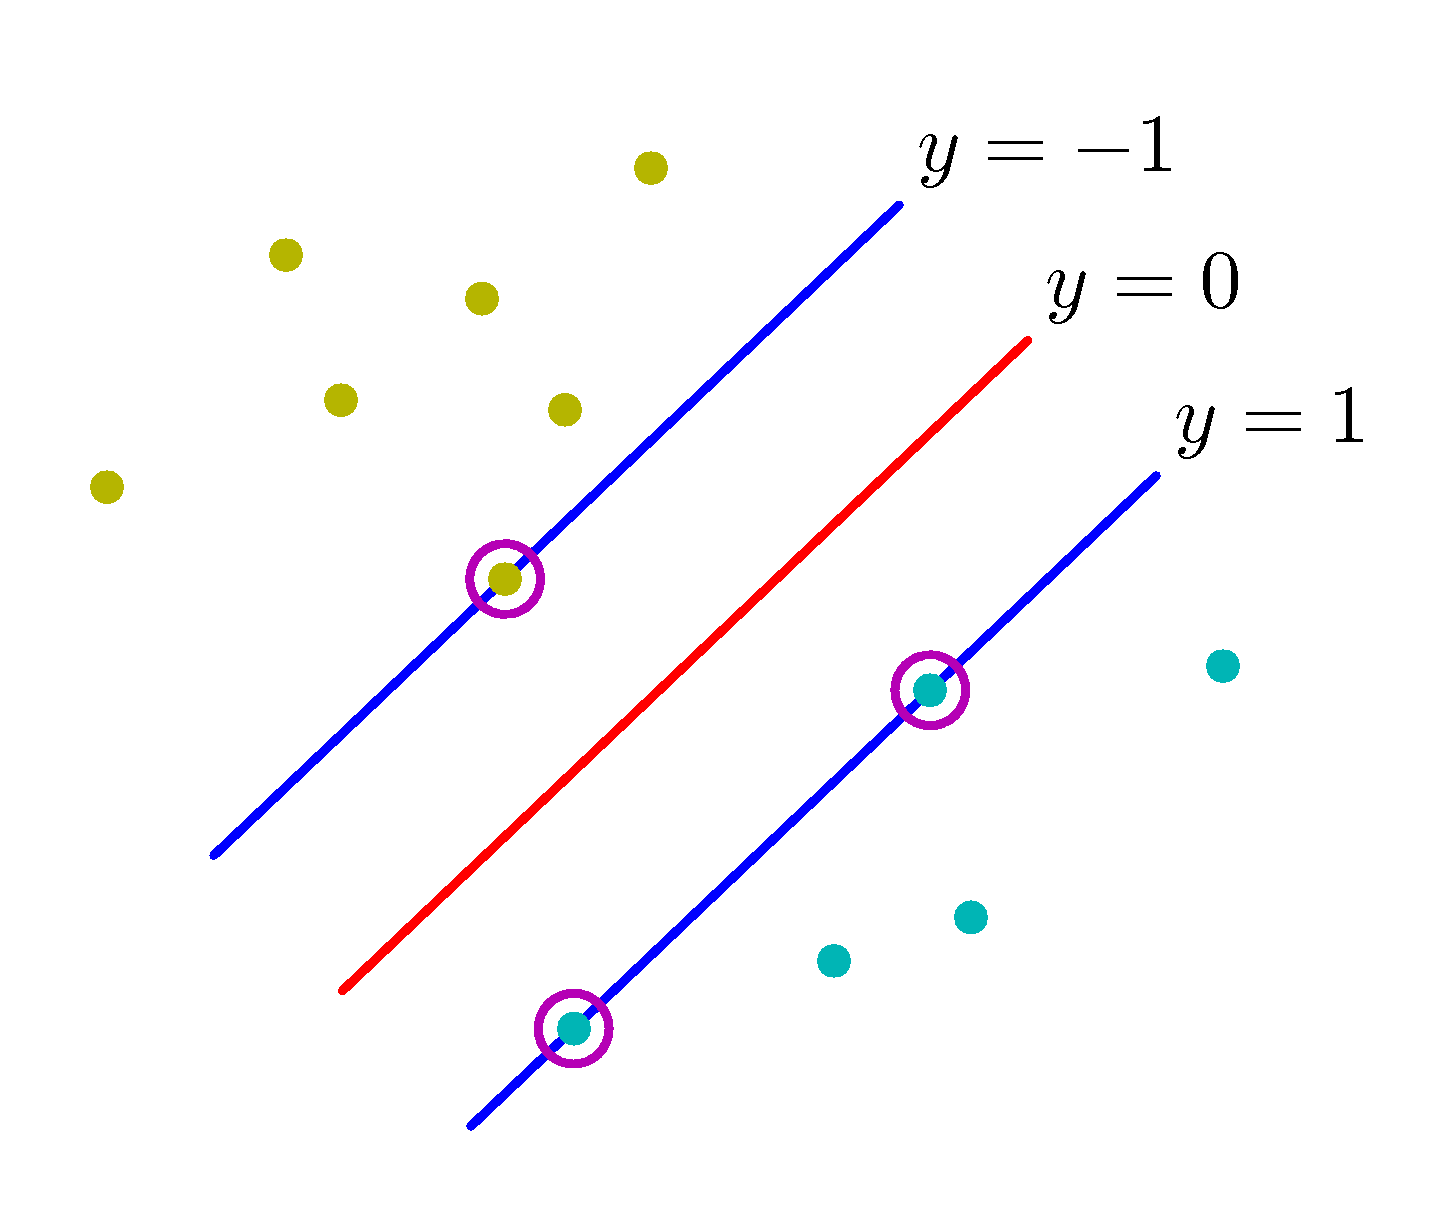

In [2]:
Image('figures/Figure7.1b.png', width=400)

to be continued...